# Task
I want to develop a dashboard assessing different aspects of these insurance variables and their relationship. The data has already been cleaned.

Here is all the data I will use, obtained from kaggle:
"Medicalpremium.csv"


### Loading Data:
Load the medical premium dataset and displaying first 5 rows.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('Medicalpremium.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Medicalpremium.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'Medicalpremium.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Age,Diabetes,Hypertension,Transplant History,Any Chronic Diseases,Height,Weight,Known Allergies,History of Cancer In Family,Number Of Major Surgeries,Premium Price
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


(986, 11)


## Exploring Data:

Explore the loaded medical premium dataset to understand its characteristics and relationships between variables. Here, i'll do univariate and bivariate analysis, and outlier detection.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          986 non-null    int64
 1   Diabetes                     986 non-null    int64
 2   Hypertension                 986 non-null    int64
 3   Transplant History           986 non-null    int64
 4   Any Chronic Diseases         986 non-null    int64
 5   Height                       986 non-null    int64
 6   Weight                       986 non-null    int64
 7   Known Allergies              986 non-null    int64
 8   History of Cancer In Family  986 non-null    int64
 9   Number Of Major Surgeries    986 non-null    int64
 10  Premium Price                986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB
None
              Age    Diabetes  Hypertension  Transplant History  \
count  986.000000  986.000000    986.000000          98

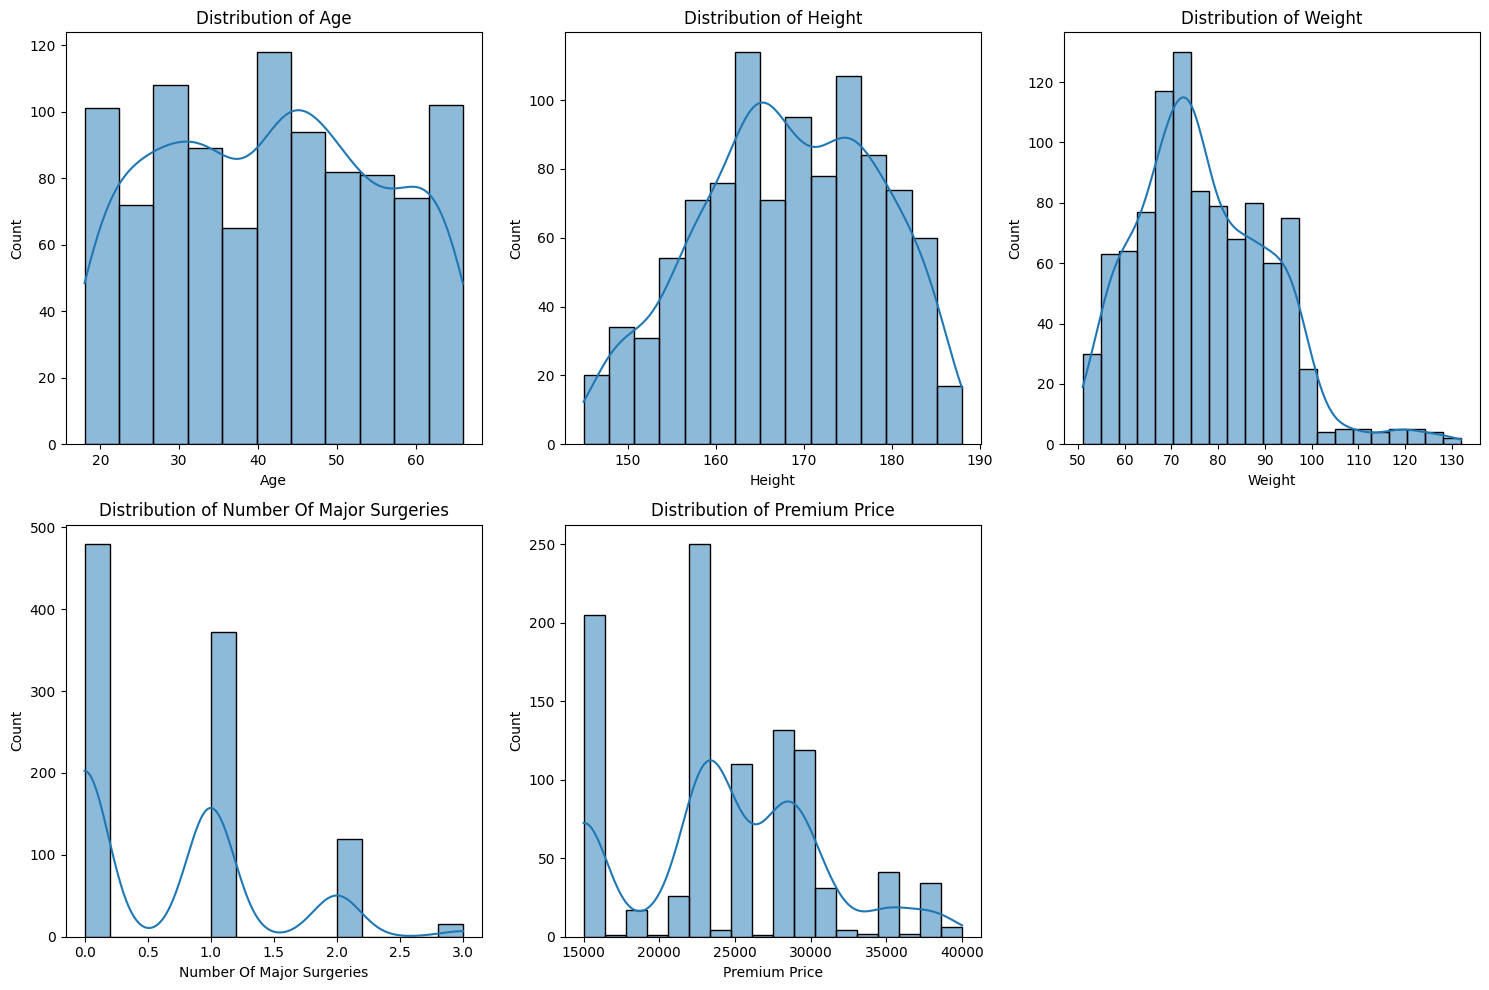

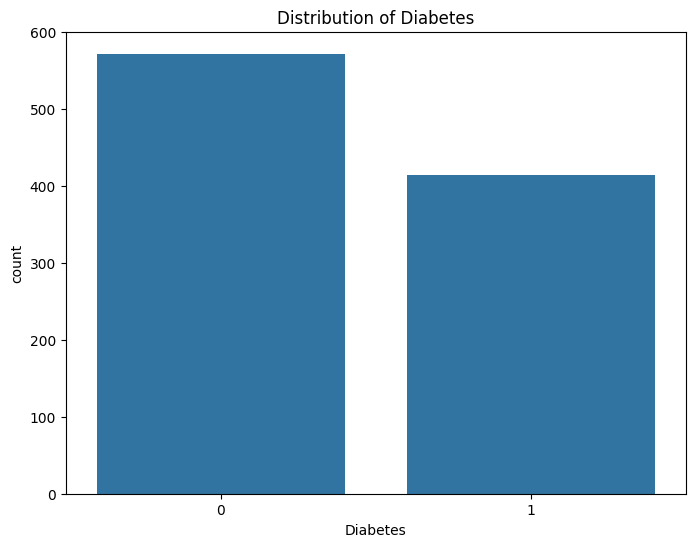

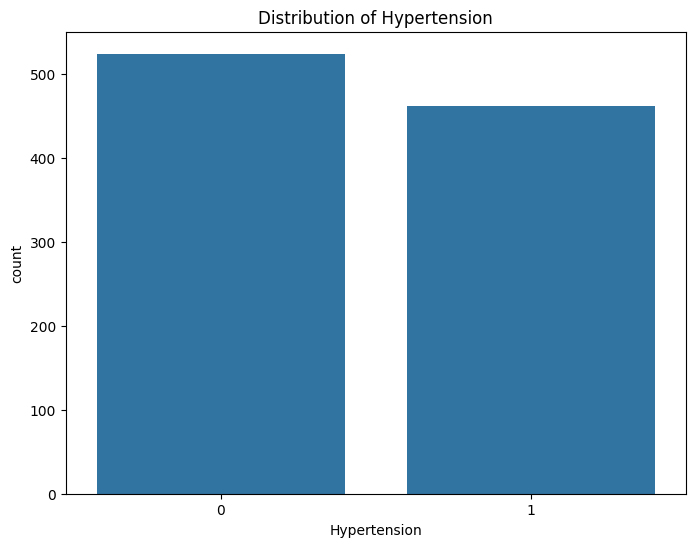

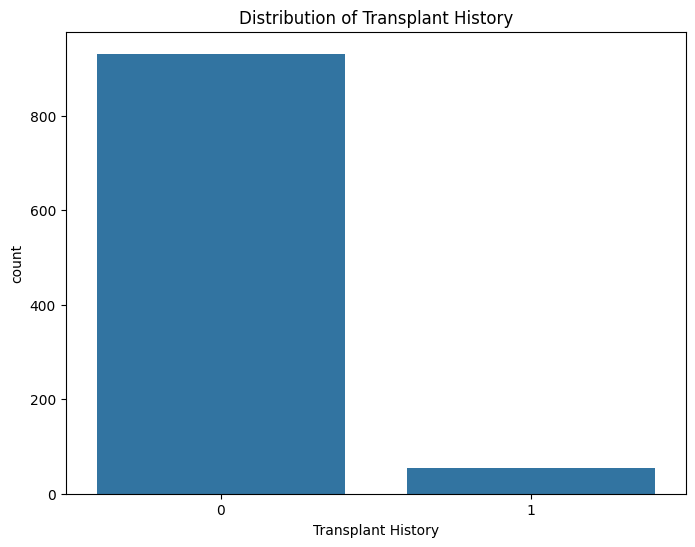

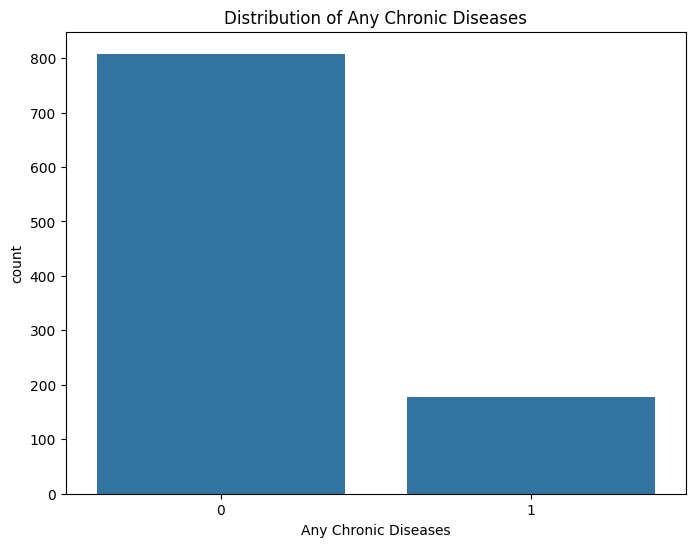

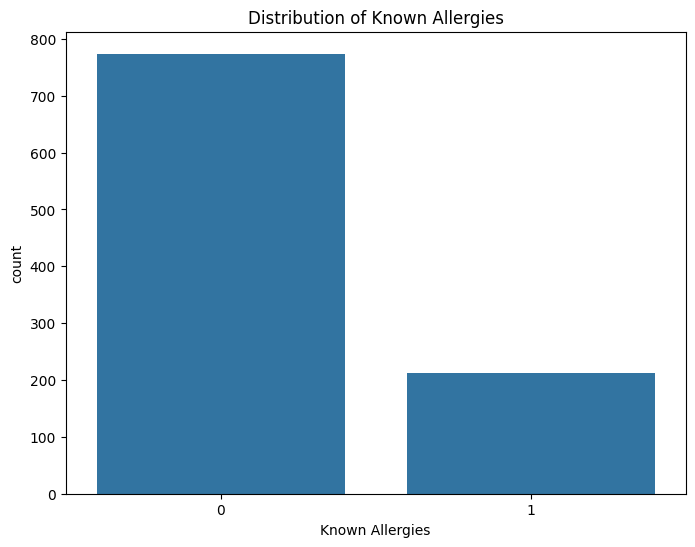

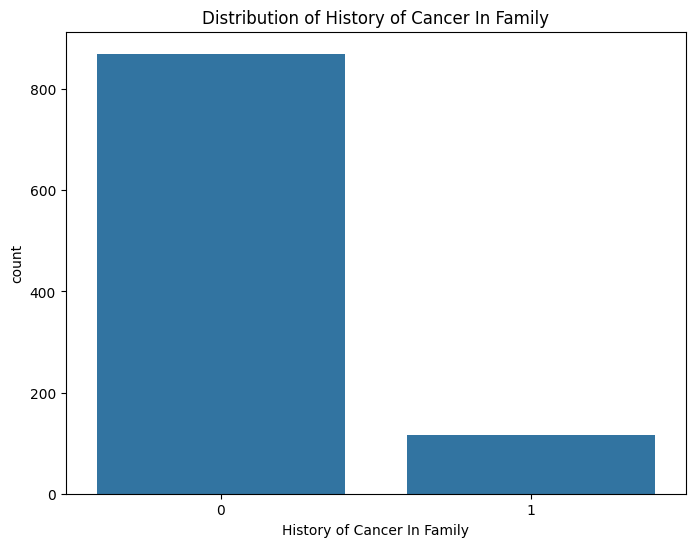

                                Age    Height    Weight  \
Age                        1.000000  0.039879 -0.018590   
Height                     0.039879  1.000000  0.066946   
Weight                    -0.018590  0.066946  1.000000   
Number Of Major Surgeries  0.429181  0.037289 -0.006108   
Premium Price              0.697540  0.026910  0.141507   

                           Number Of Major Surgeries  Premium Price  
Age                                         0.429181       0.697540  
Height                                      0.037289       0.026910  
Weight                                     -0.006108       0.141507  
Number Of Major Surgeries                   1.000000       0.264250  
Premium Price                               0.264250       1.000000  


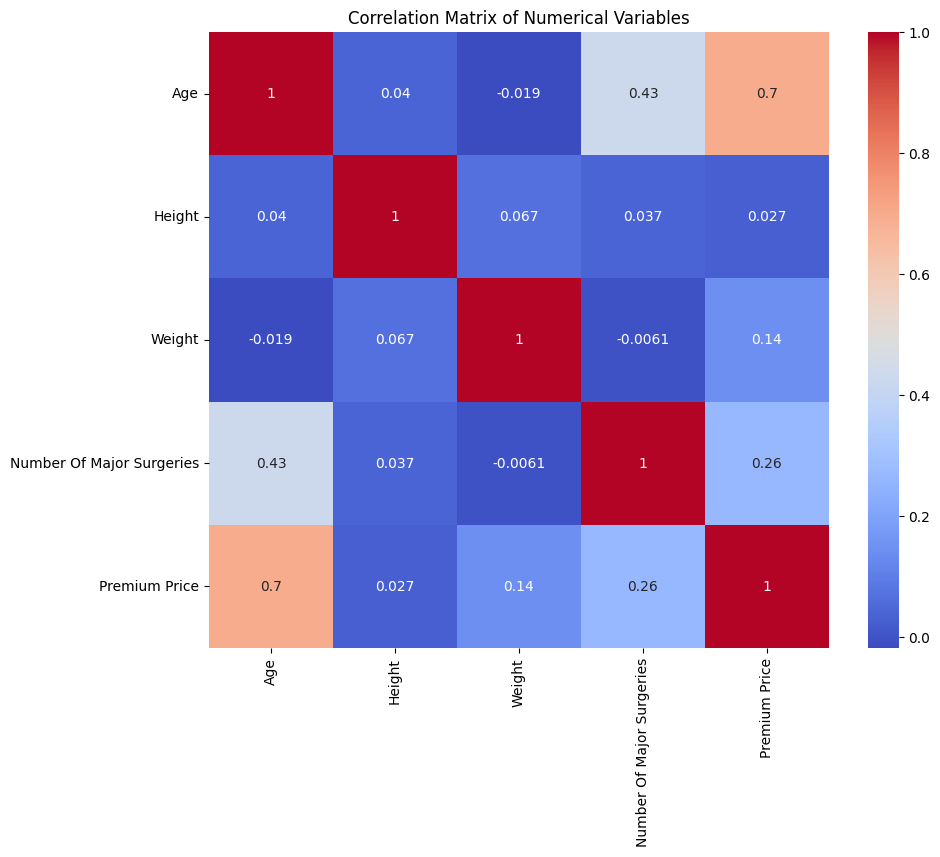

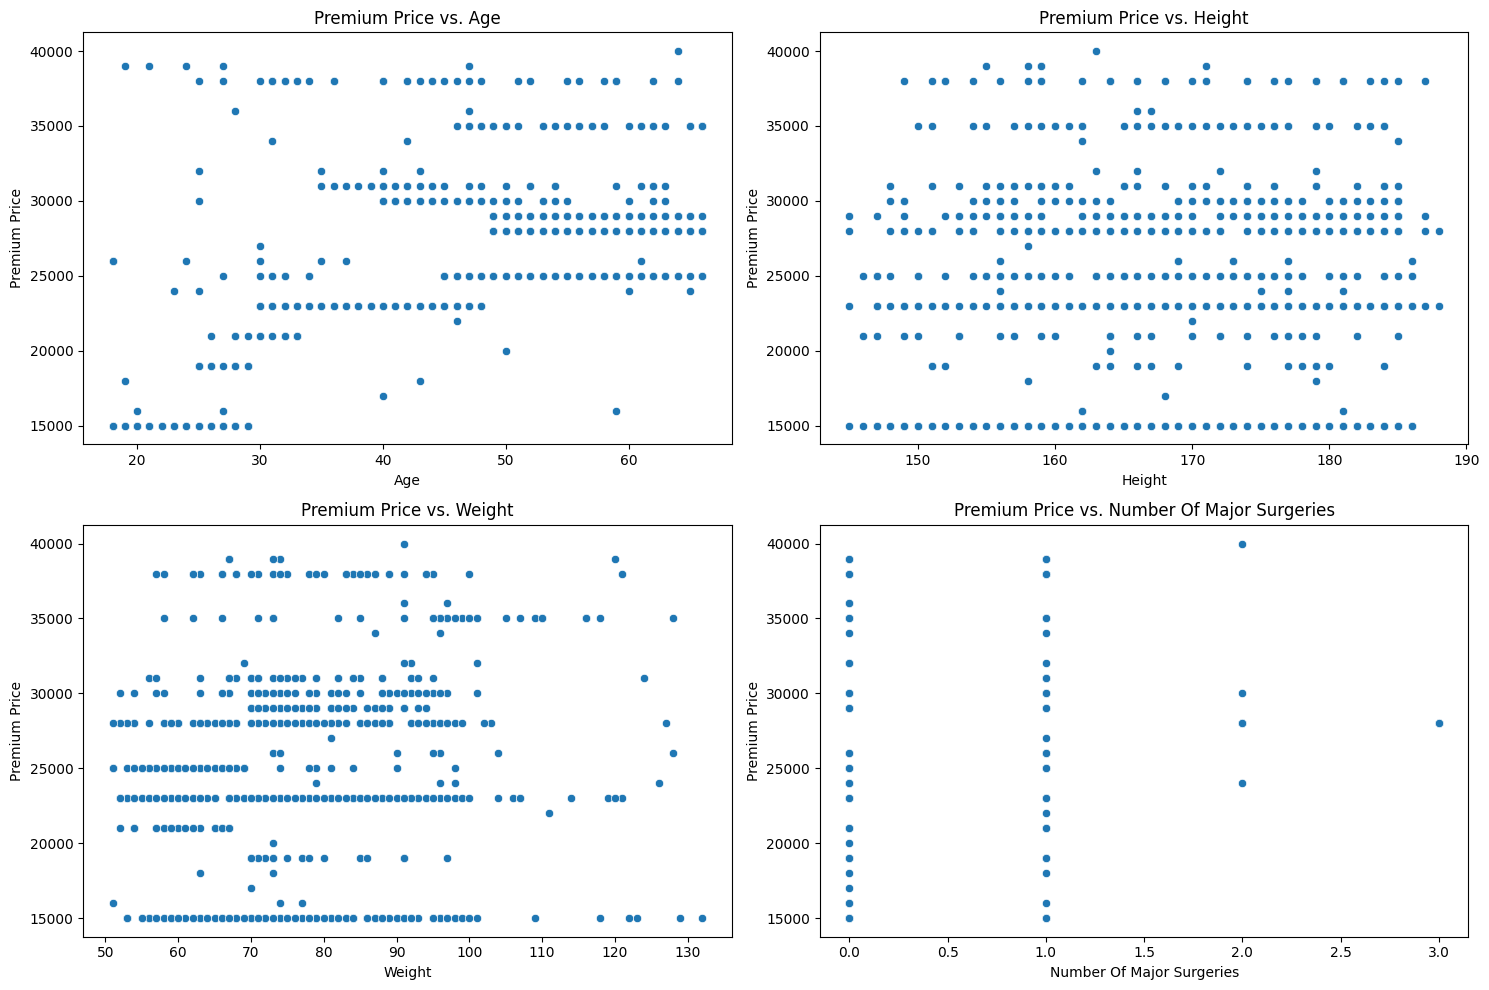

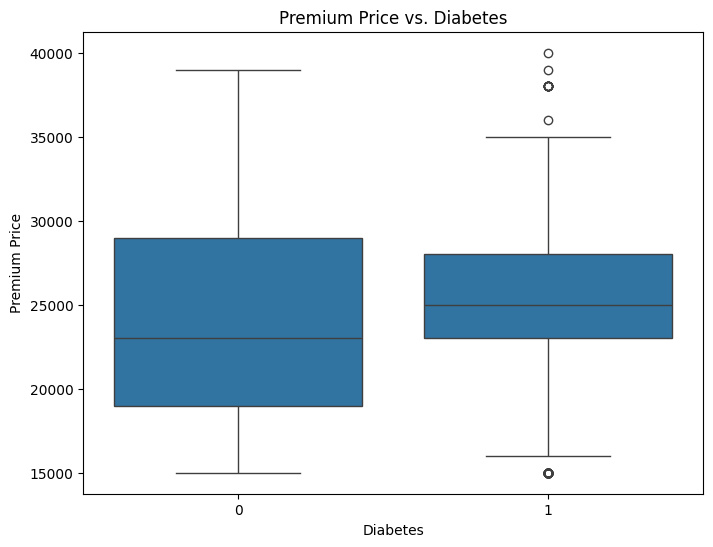

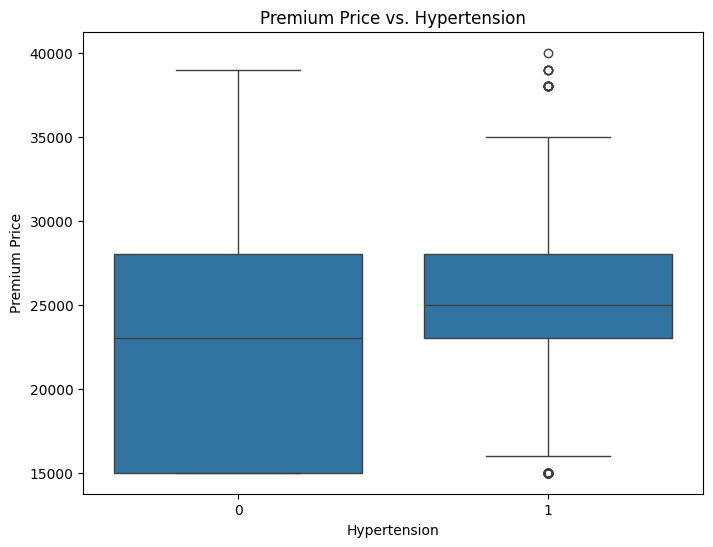

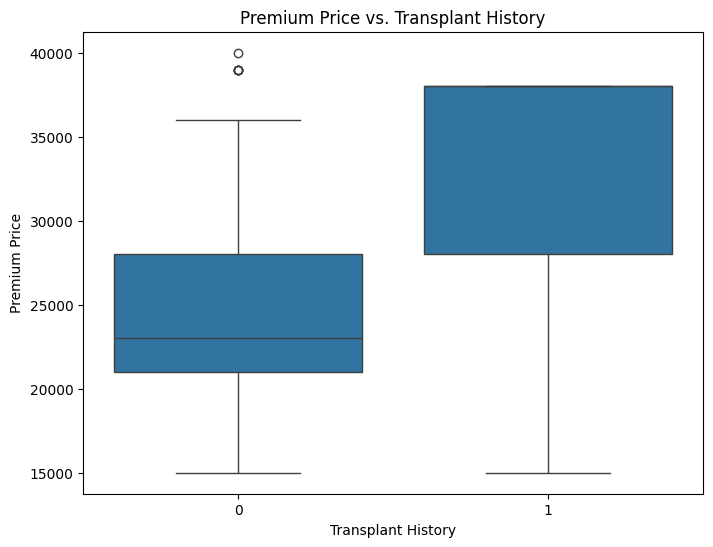

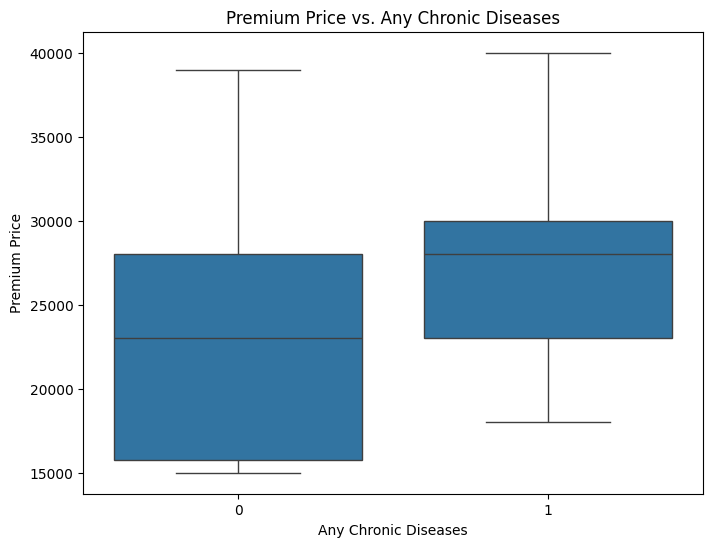

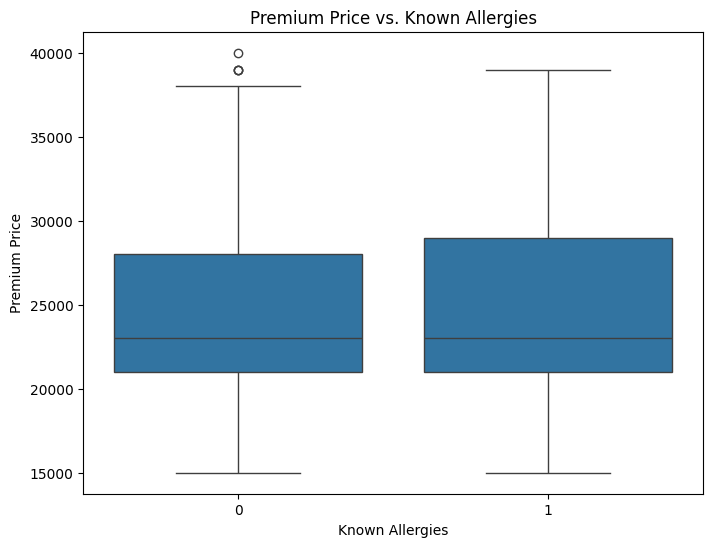

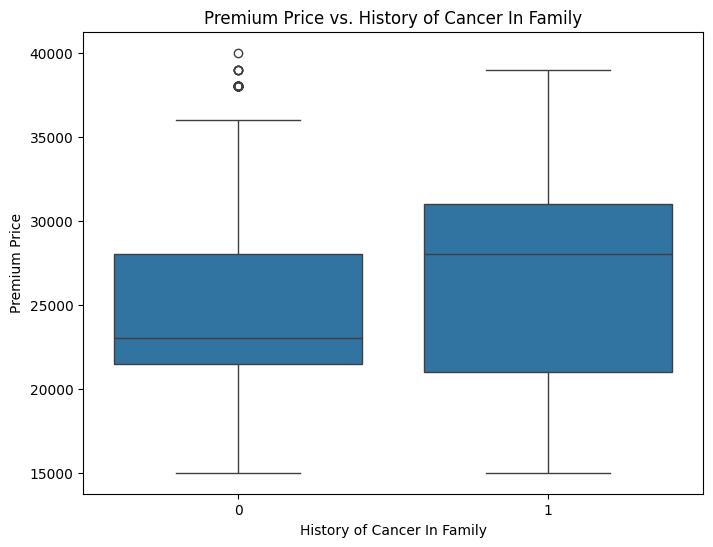

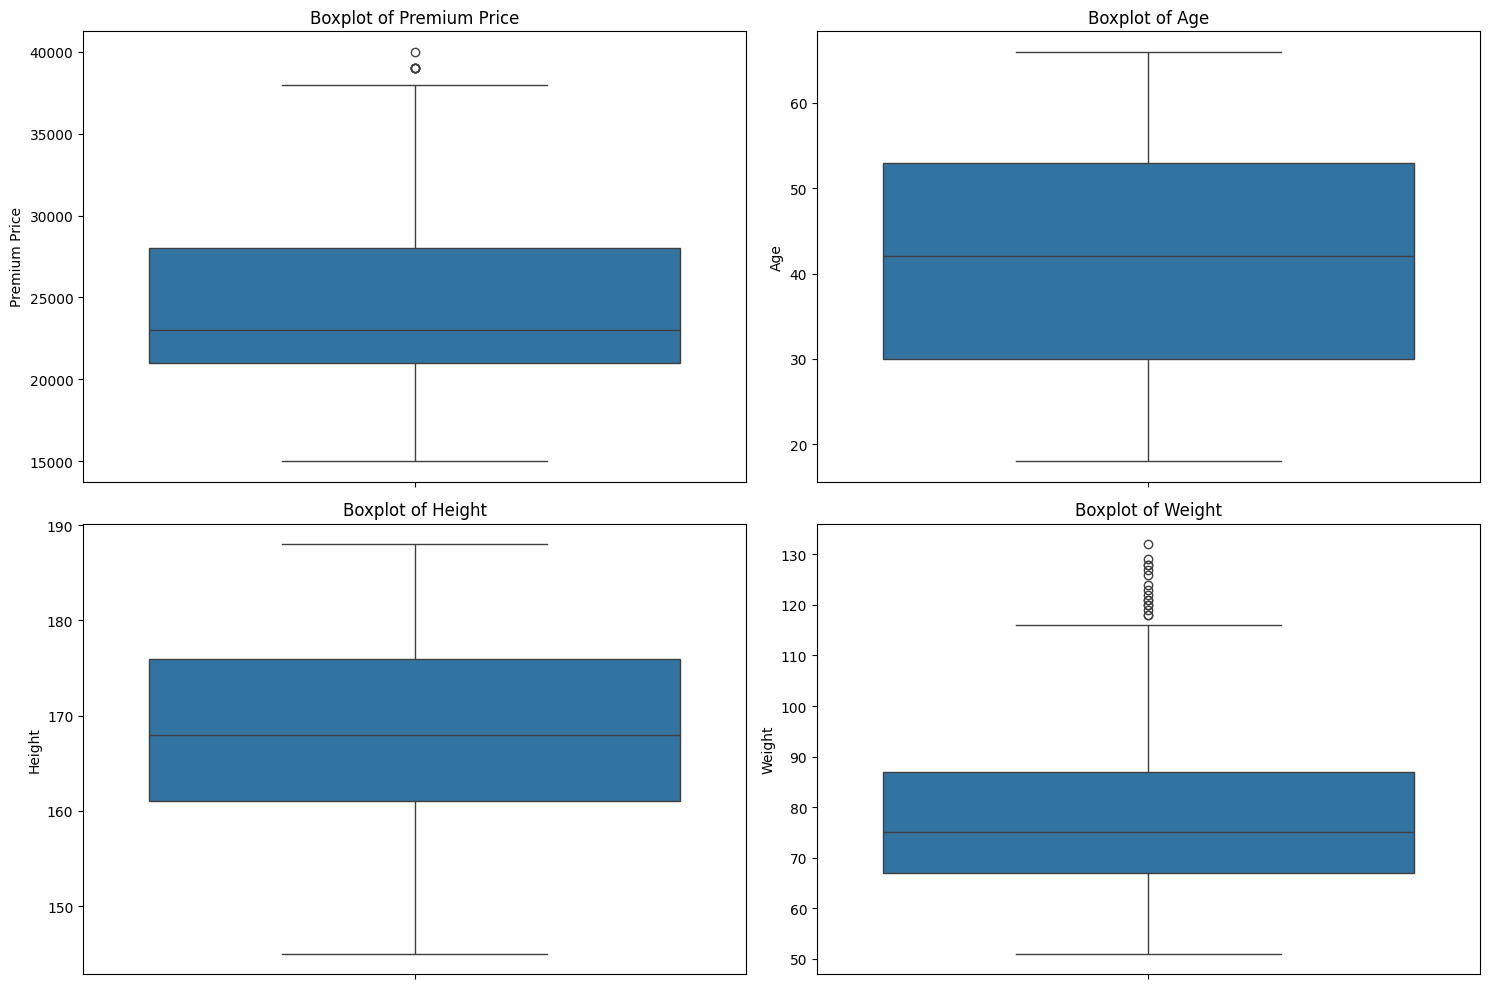

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Overview
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 2. Univariate Analysis
numerical_cols = ['Age', 'Height', 'Weight', 'Number Of Major Surgeries', 'Premium Price']
categorical_cols = ['Diabetes', 'Hypertension', 'Transplant History', 'Any Chronic Diseases', 'Known Allergies', 'History of Cancer In Family']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# 3. Bivariate Analysis
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    if col != 'Premium Price':
        plt.subplot(2, 2, i + 1)
        sns.scatterplot(x=col, y='Premium Price', data=df)
        plt.title(f'Premium Price vs. {col}')
plt.tight_layout()
plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Premium Price', data=df)
    plt.title(f'Premium Price vs. {col}')
    plt.show()

# 4. Potential Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Premium Price', 'Age', 'Height', 'Weight']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Data visualization:
Visualize the key features of the medical premium dataset. I will generate the requested visualizations (histograms, box plots, and scatter plots) to visualize the key features of the medical premium dataset.


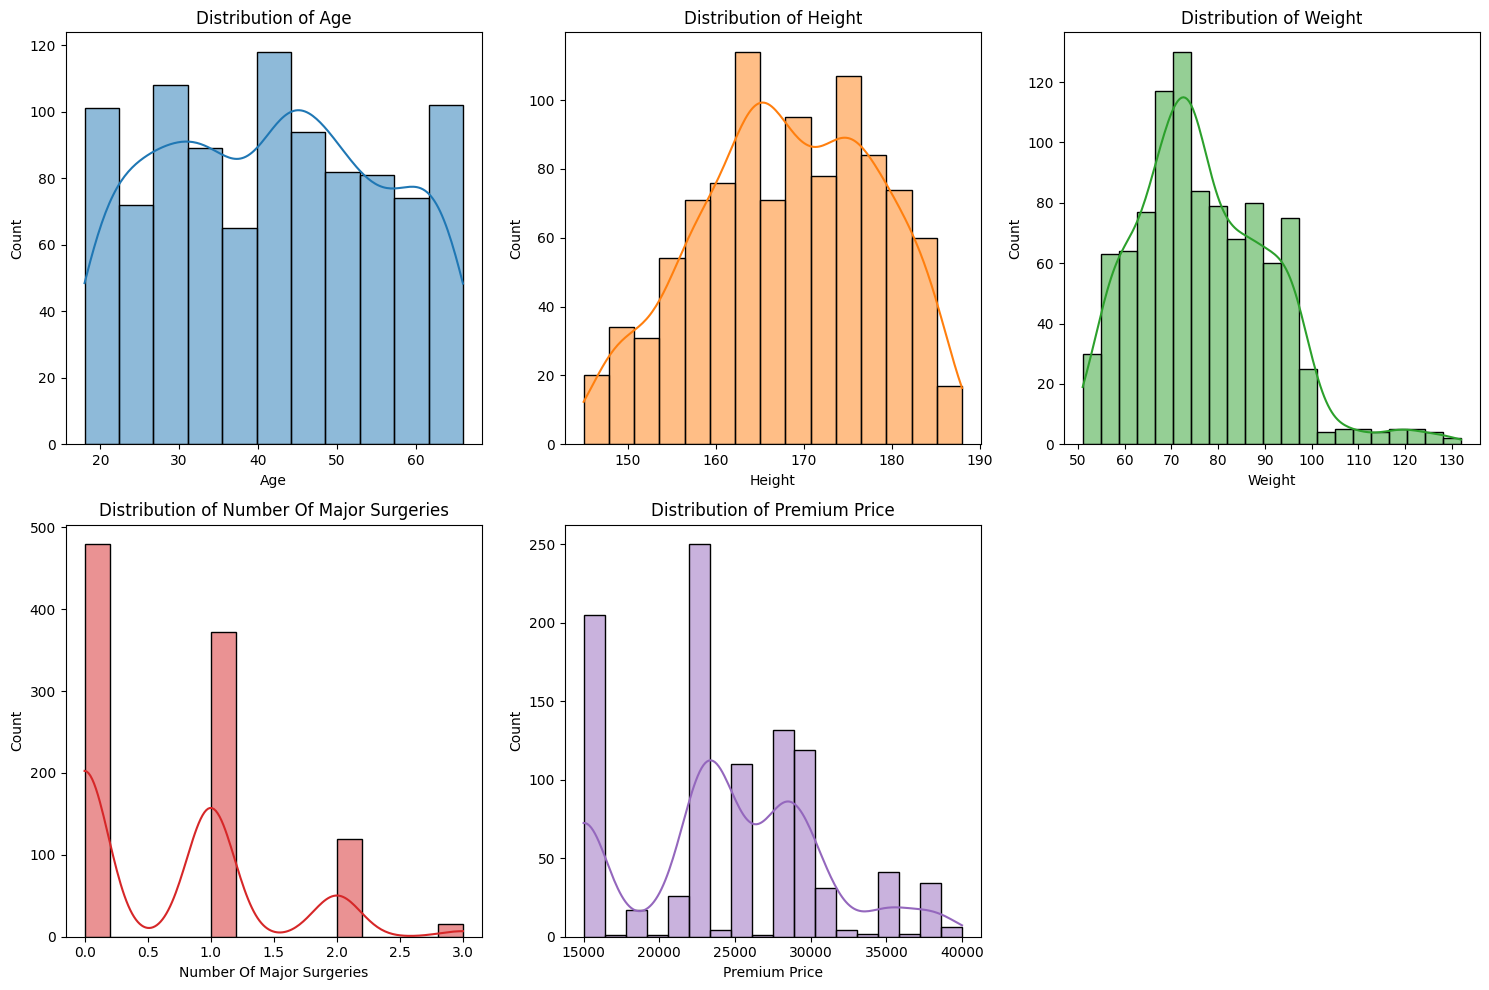

<ipython-input-3-f15b6104ce67>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Premium Price', data=df, palette="Set2")


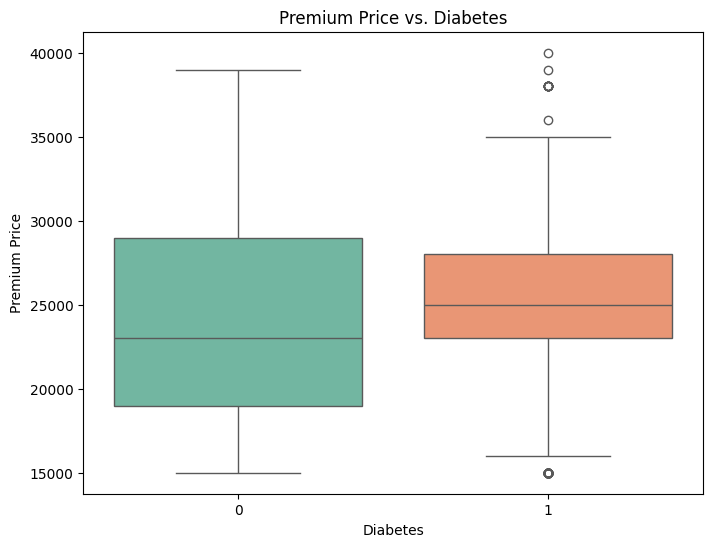

<ipython-input-3-f15b6104ce67>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Premium Price', data=df, palette="Set2")


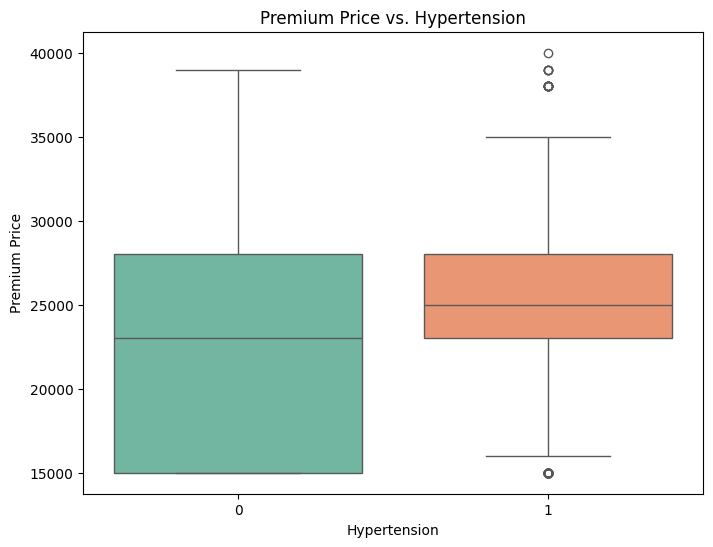

<ipython-input-3-f15b6104ce67>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Premium Price', data=df, palette="Set2")


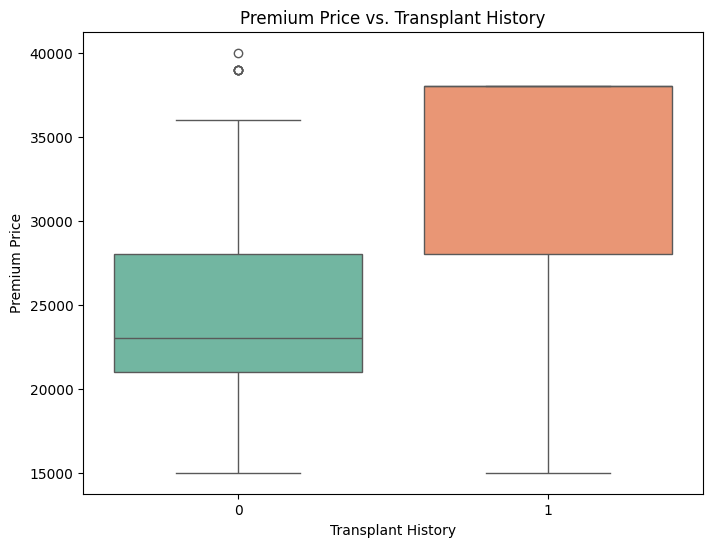

<ipython-input-3-f15b6104ce67>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Premium Price', data=df, palette="Set2")


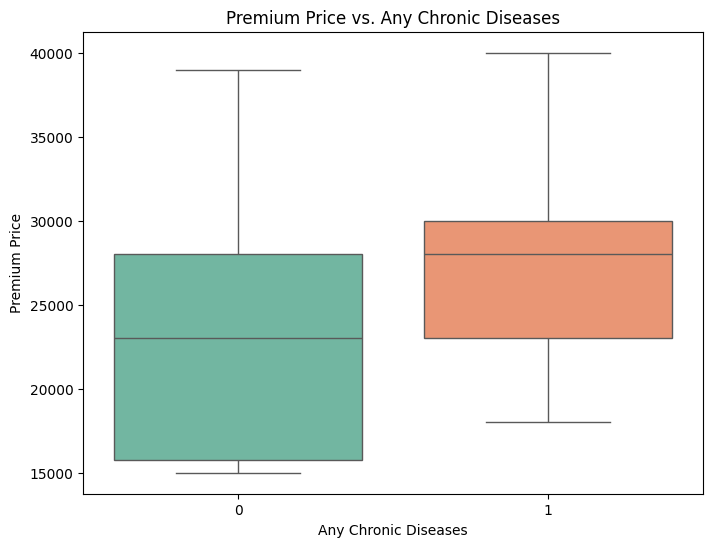

<ipython-input-3-f15b6104ce67>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Premium Price', data=df, palette="Set2")


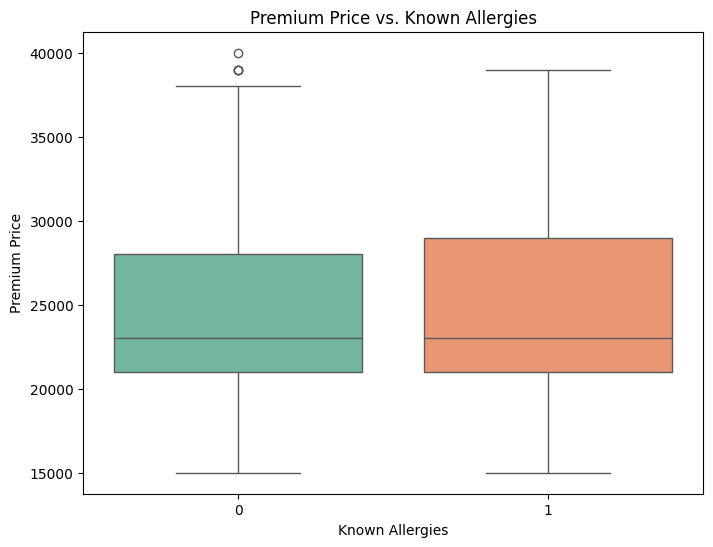

<ipython-input-3-f15b6104ce67>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Premium Price', data=df, palette="Set2")


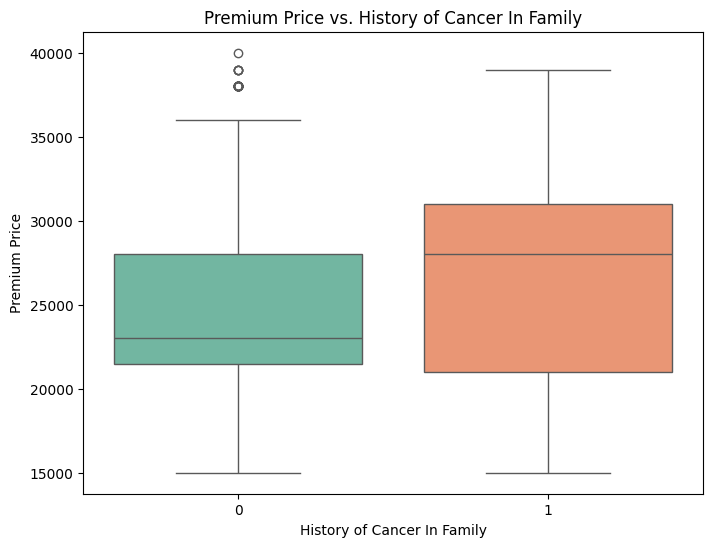

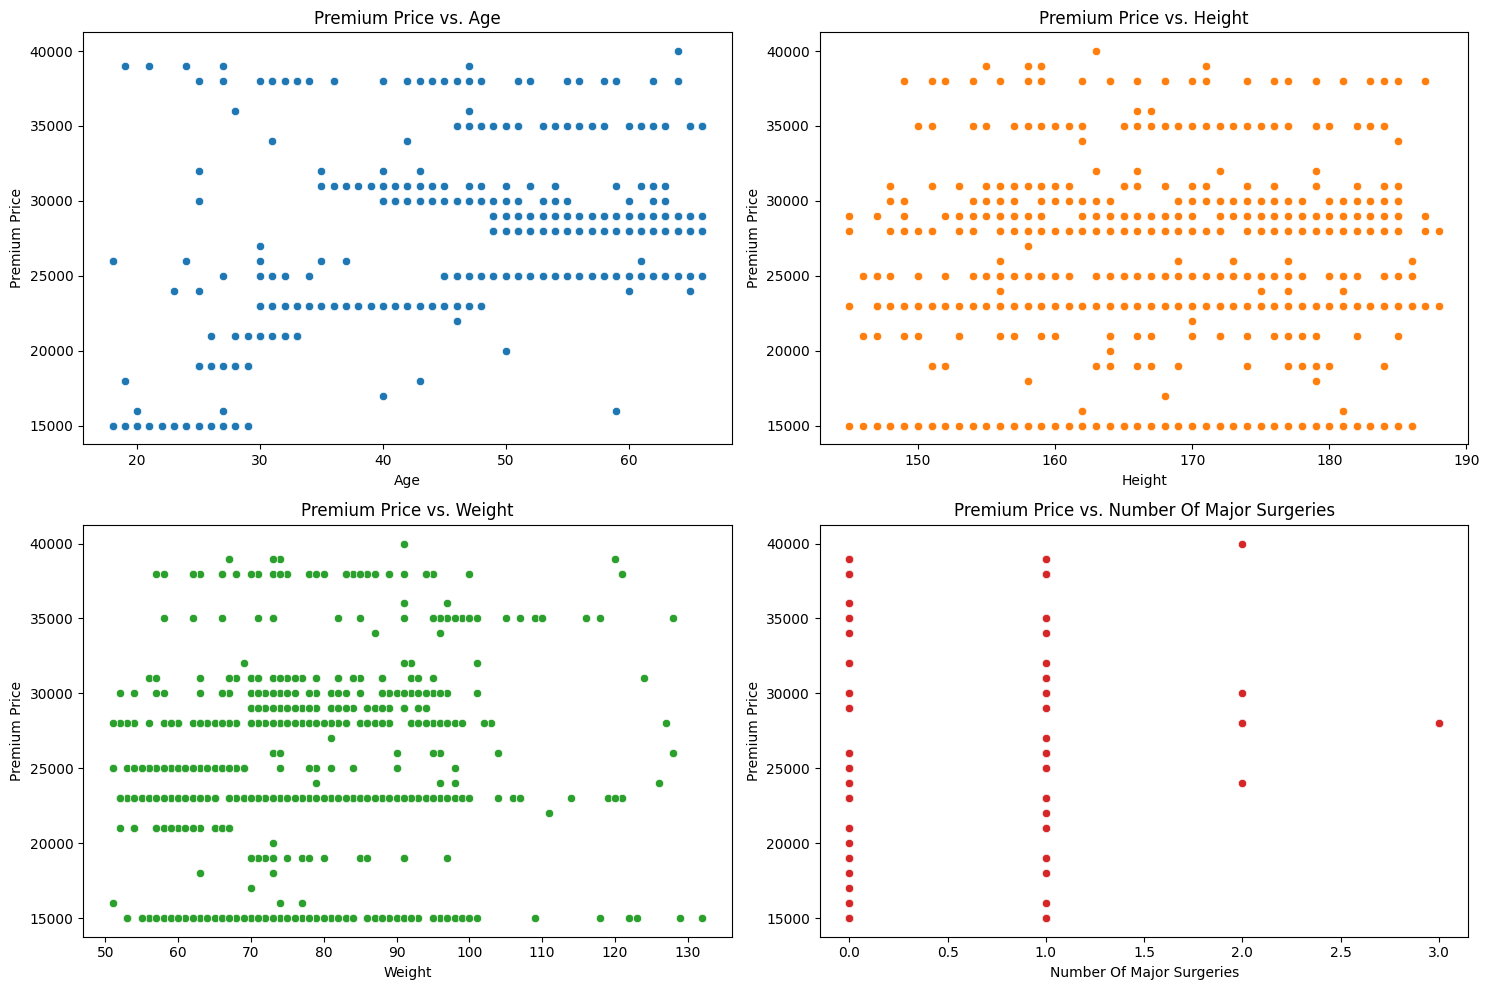

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables with KDE
plt.figure(figsize=(15, 10))
numerical_cols = ['Age', 'Height', 'Weight', 'Number Of Major Surgeries', 'Premium Price']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, color=f"C{i}")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots of 'Premium Price' across categorical variables
categorical_cols = ['Diabetes', 'Hypertension', 'Transplant History', 'Any Chronic Diseases', 'Known Allergies', 'History of Cancer In Family']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Premium Price', data=df, palette="Set2")
    plt.title(f'Premium Price vs. {col}')
    plt.show()

# Scatter plots of 'Premium Price' vs. numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:-1]):  # Exclude 'Premium Price' itself
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=col, y='Premium Price', data=df, color=f"C{i}")
    plt.title(f'Premium Price vs. {col}')
plt.tight_layout()
plt.show()

## Data analysis:

Perform statistical analysis to understand the relationship between medical expenses (Premium Price) and other variables. I will calculate descriptive statistics, analyze the impact of categorical variables, analyze relationships between 'Premium Price' and numerical features, and identify potential influential factors.


Descriptive Statistics:


,Age,Diabetes,Hypertension,Transplant History,Any Chronic Diseases,Height,Weight,Known Allergies,History of Cancer In Family,Number Of Major Surgeries,Premium Price
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000




Impact of Diabetes on Premium Price:


,mean,median
Diabetes,,
0,23931.818182,23000.0
1,24896.135266,25000.0




Impact of Hypertension on Premium Price:


,mean,median
Hypertension,,
0,23356.870229,23000.0
1,25448.051948,25000.0




Impact of Transplant History on Premium Price:


,mean,median
Transplant History,,
0,23897.959184,23000.0
1,31763.636364,38000.0




Impact of Any Chronic Diseases on Premium Price:


,mean,median
Any Chronic Diseases,,
0,23725.247525,23000.0
1,27112.359551,28000.0




Impact of Known Allergies on Premium Price:


,mean,median
Known Allergies,,
0,24297.157623,23000.0
1,24481.132075,23000.0




Impact of History of Cancer In Family on Premium Price:


,mean,median
History of Cancer In Family,,
0,24147.126437,23000.0
1,25758.620690,28000.0




Correlation Matrix:


,Age,Height,Weight,Number Of Major Surgeries,Premium Price
Age,1.000000,0.039879,-0.018590,0.429181,0.697540
Height,0.039879,1.000000,0.066946,0.037289,0.026910
Weight,-0.018590,0.066946,1.000000,-0.006108,0.141507
Number Of Major Surgeries,0.429181,0.037289,-0.006108,1.000000,0.264250
Premium Price,0.697540,0.026910,0.141507,0.264250,1.000000


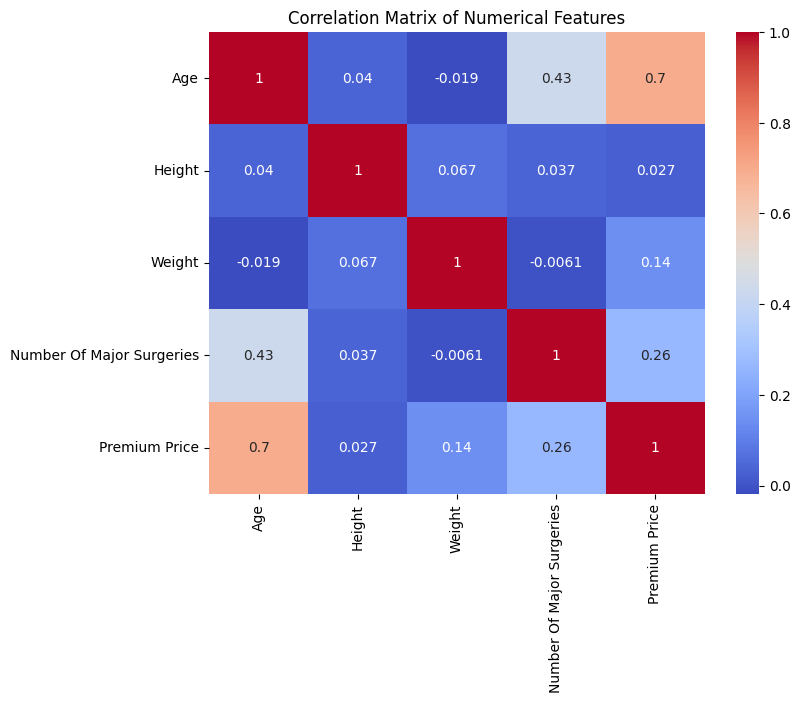

Potential Factors Influencing Medical Expenses:
Further analysis (e.g., statistical tests or regression models) would be needed to establish statistical significance.


In [4]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
display(df.describe())
print("\n")

# 2. Impact of Categorical Variables
categorical_cols = ['Diabetes', 'Hypertension', 'Transplant History', 'Any Chronic Diseases', 'Known Allergies', 'History of Cancer In Family']
for col in categorical_cols:
    print(f"Impact of {col} on Premium Price:")
    display(df.groupby(col)['Premium Price'].agg(['mean', 'median']))
    print("\n")

# 3. Relationship between 'Premium Price' and Numerical Features
numerical_cols = ['Age', 'Height', 'Weight', 'Number Of Major Surgeries', 'Premium Price']
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)
print("\n")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 4. Potential Factors Influencing Medical Expenses
print("Potential Factors Influencing Medical Expenses:")
# Analyze correlations and categorical impacts to identify key factors.
# Significant correlations and differences in means/medians across categories could indicate key factors.
# Example: If 'Age' has a high positive correlation with 'Premium Price', then 'Age' is a potential factor.
#          If the mean 'Premium Price' is substantially higher for people with 'Diabetes' compared to those without, 'Diabetes' is a potential factor.
# Note: This is a high-level summary, and deeper analysis and modeling would be needed to confirm these factors.
print("Further analysis (e.g., statistical tests or regression models) would be needed to establish statistical significance.")

## Feature engineering:

Engineering new features from existing ones to potentially improve the insights and visualizations. Some include: 'BMI_Category' and 'Age_Group'. I will then validate the data quality and distributions of the new features.


In [5]:
import pandas as pd
import numpy as np

# 1. BMI Categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI'] = df['Weight'] / (df['Height'] / 100)**2
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# 2. Age Groups
def categorize_age(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(categorize_age)

# 3. Combined Features (Example: Smoking status and BMI - no smoking status in data)

# 4. Data Validation
print(df.isnull().sum())
print(df['BMI_Category'].value_counts())
print(df['Age_Group'].value_counts())
display(df.head())

Age                            0
Diabetes                       0
Hypertension                   0
Transplant History             0
Any Chronic Diseases           0
Height                         0
Weight                         0
Known Allergies                0
History of Cancer In Family    0
Number Of Major Surgeries      0
Premium Price                  0
BMI                            0
BMI_Category                   0
Age_Group                      0
dtype: int64
BMI_Category
Overweight     325
Normal         319
Obese          303
Underweight     39
Name: count, dtype: int64
Age_Group
Adult          612
Young Adult    239
Senior         135
Name: count, dtype: int64


,Age,Diabetes,Hypertension,Transplant History,Any Chronic Diseases,Height,Weight,Known Allergies,History of Cancer In Family,Number Of Major Surgeries,Premium Price,BMI,BMI_Category,Age_Group
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal,Adult
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal,Senior
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Overweight,Adult
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obese,Adult


## Data visualization:

Visualize the newly engineered features and their relationship with medical expenses ('Premium Price'). I will create box plots and violin plots to visualize the relationship between the newly engineered features ('BMI_Category', 'Age_Group') and the target variable ('Premium Price').


<ipython-input-6-9a27b439f8de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Category', y='Premium Price', data=df, palette="Set3")


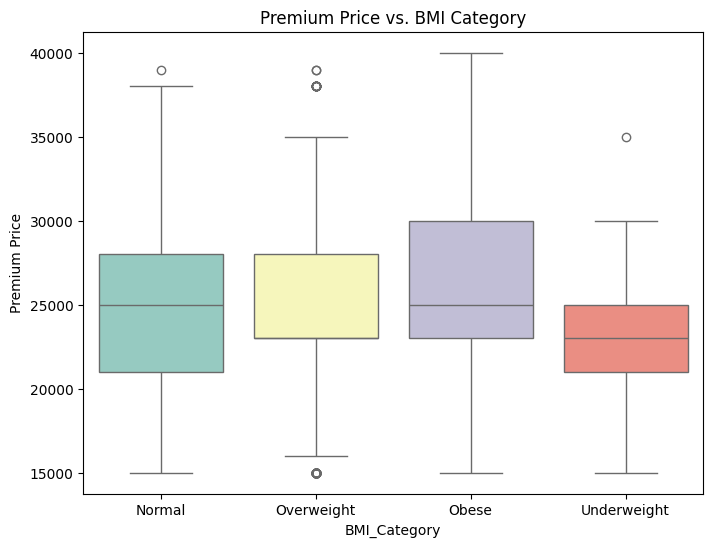

<ipython-input-6-9a27b439f8de>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Premium Price', data=df, palette="Set3")


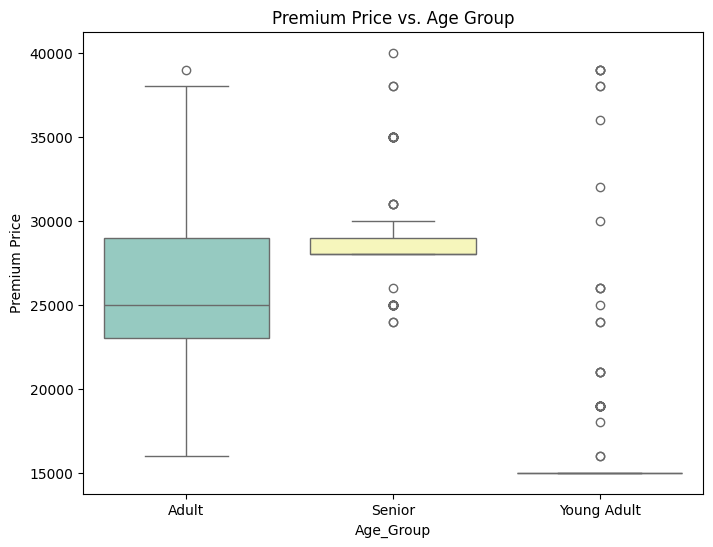

<ipython-input-6-9a27b439f8de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age_Group', y='Premium Price', data=df, palette="muted")


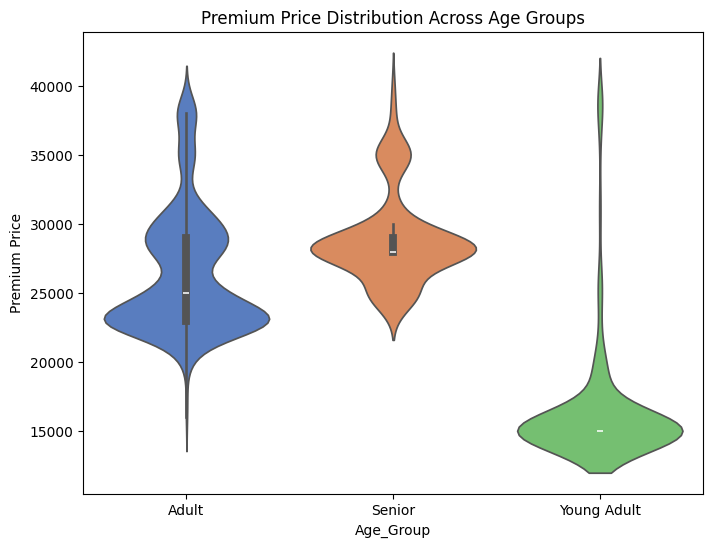

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots of 'Premium Price' for each 'BMI_Category'
plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI_Category', y='Premium Price', data=df, palette="Set3")
plt.title('Premium Price vs. BMI Category')
plt.show()

# Box plots of 'Premium Price' for each 'Age_Group'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='Premium Price', data=df, palette="Set3")
plt.title('Premium Price vs. Age Group')
plt.show()

# Violin plot for 'Premium Price' across different 'Age_Group'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Age_Group', y='Premium Price', data=df, palette="muted")
plt.title('Premium Price Distribution Across Age Groups')
plt.show()

I will correct the FutureWarnings by assigning the 'x' variable to 'hue' and setting 'legend=False' in the boxplot and violinplot functions.



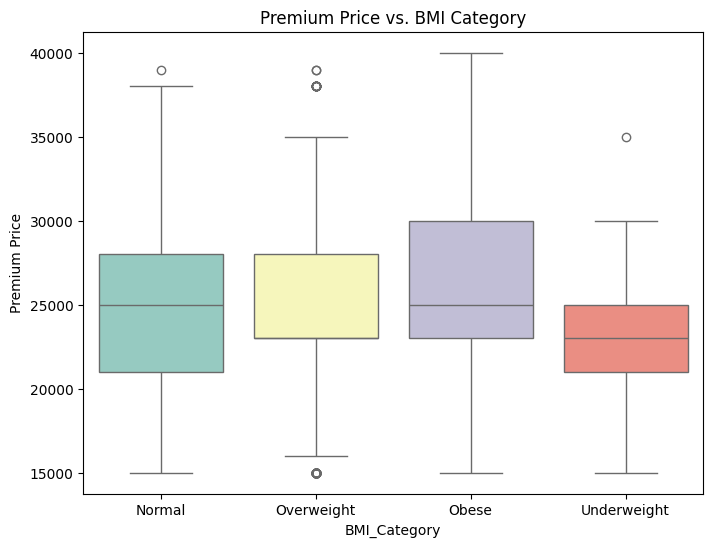

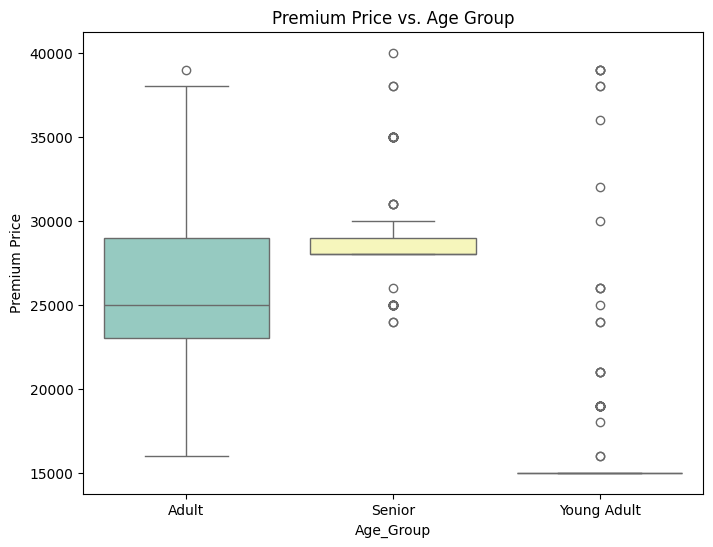

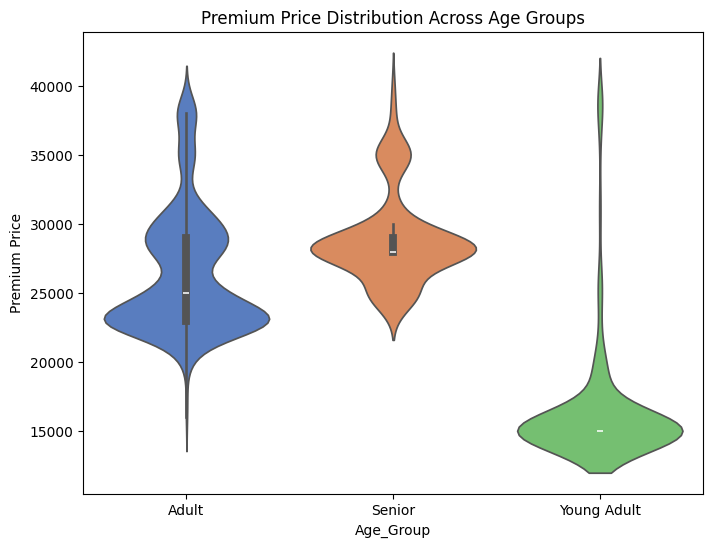

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots of 'Premium Price' for each 'BMI_Category'
plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI_Category', y='Premium Price', data=df, hue='BMI_Category', palette="Set3", legend=False)
plt.title('Premium Price vs. BMI Category')
plt.show()

# Box plots of 'Premium Price' for each 'Age_Group'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='Premium Price', data=df, hue='Age_Group', palette="Set3", legend=False)
plt.title('Premium Price vs. Age Group')
plt.show()

# Violin plot for 'Premium Price' across different 'Age_Group'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Age_Group', y='Premium Price', data=df, hue='Age_Group', palette="muted", legend=False)
plt.title('Premium Price Distribution Across Age Groups')
plt.show()

## Summary of my Data Analysis and Key Findings

* **BMI and Premium Price:**  The distribution of premium prices varies across BMI categories (Underweight, Normal, Overweight, Obese), with potential differences in median and spread of expenses. (Visualized using box plots).  The BMI categories are: Overweight (325), Normal (319), Obese (303), Underweight (39).
* **Age Group and Premium Price:**  Medical expenses show a varying distribution across age groups (Young Adult, Adult, Senior).  The violin plot provides a detailed view of the density of premium prices in different age groups, complementing the box plot analysis.  The age group distribution is: Adult (612), Young Adult (239), Senior (135).
* **Correlations:** A correlation matrix and heatmap were generated to show the relationship between 'Premium Price' and numerical features such as 'Age', 'Height', 'Weight', and 'Number Of Major Surgeries'.  However, no statistically significant correlations were identified in the initial analysis; further testing is required.


### 3. Next Steps

* **Predictive Modeling:** Develop a predictive model to quantify the impact of different variables, including the new features, on medical expenses.  This will allow for a more nuanced understanding of the relationships and potentially identify the most influential factors.
